# Classification Model

In [3]:
# Load libraries
#from pandas.plotting import scatter_matrix
from matplotlib import pyplot

#import seaborn as sns
from datetime import datetime
import numpy as np
import pandas as pd
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Loading data

Dataset chosen for HW1 is the Uber/Lyft price dataset available on Kaggle: https://www.kaggle.com/ravi72munde/uber-lyft-cab-prices
This dataset is price data (includes price & surge multiplier) collected from the Lyft & Uber APIs in Boston in Nov-Dec 2018. Surge multiplier is the factor by which Uber/Lyft scale the normal price between an origin and destination at a given time. If surge multiplier = 1.0 then the price is regular price.

The problem in HW2 is to predict the surge multiplier class [1, 1.25, 1.5, 1.75, 2, 2.25, 2.5] based on distance, weather, day of week, time of day, etc.

In [4]:
# Load dataset
filename = 'cab_rides.csv'
cabs_df = pd.read_csv(filename)
cabs_df.head(3)


,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft


Another dataset available to add more features to the model is the weather information.

In [5]:
filename = 'weather.csv'
weather_df = pd.read_csv(filename)
weather_df.head(3)

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07


# Basic Descriptive Statistics

In [3]:
# Descriptive Statistics
cabs_df.shape

(693071, 10)

In [13]:
# description
cabs_df.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [15]:

cabs_df.groupby('cab_type').size()
#dataset.groupby('IntersectionId').size()

cab_type
Lyft    307408
Uber    385663
dtype: int64

In [16]:
cabs_df.dtypes

distance            float64
cab_type             object
time_stamp            int64
destination          object
source               object
price               float64
surge_multiplier    float64
id                   object
product_id           object
name                 object
dtype: object

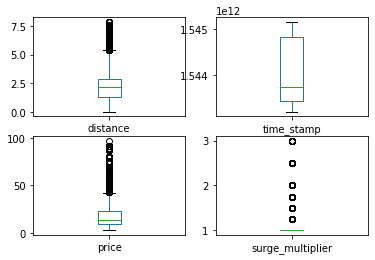

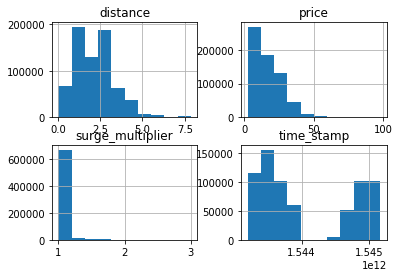

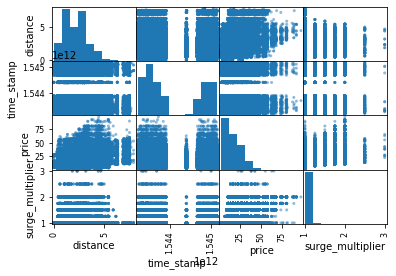

In [8]:
# Data visualizations

# box and whisker plots
cabs_df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()
# histograms
cabs_df.hist()
pyplot.show()
# scatter plot matrix
scatter_matrix(cabs_df)
pyplot.show()


# Data Processing & Preliminary Analysis

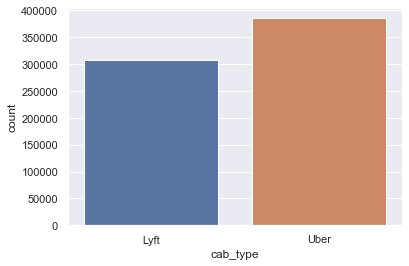

In [20]:
# Changing to categorical variables
ride_provider = ['Uber','Lyft']
cabs_df.cab_type.astype("category")

sns.set()
sns.countplot(cabs_df['cab_type'])

In [12]:
cabs_df.name.unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi'],
      dtype=object)

In [13]:
cabs_df.product_id.unique()

array(['lyft_line', 'lyft_premier', 'lyft', 'lyft_luxsuv', 'lyft_plus',
       'lyft_lux', '6f72dfc5-27f1-42e8-84db-ccc7a75f6969',
       '6c84fd89-3f11-4782-9b50-97c468b19529',
       '55c66225-fbe7-4fd5-9072-eab1ece5e23e',
       '9a0e7b09-b92b-4c41-9779-2ad22b4d779d',
       '6d318bcc-22a3-4af6-bddd-b409bfce1546',
       '997acbb5-e102-41e1-b155-9df7de0a73f2',
       '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a'], dtype=object)

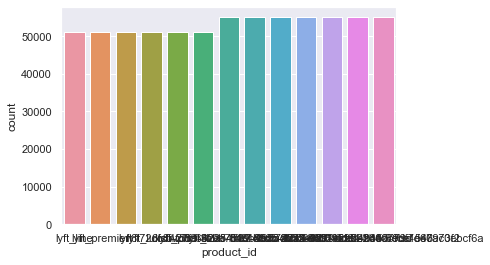

In [18]:
# Plotting frequency of 'product_id' 
sns.set()
sns.countplot(cabs_df['product_id'])


In [17]:
#Frequency of types of rides ('name')
cabs_df.name.value_counts()

WAV             55096
Black SUV       55096
UberXL          55096
Black           55095
Taxi            55095
UberX           55094
UberPool        55091
Lux Black       51235
Lux Black XL    51235
Lux             51235
Lyft XL         51235
Lyft            51235
Shared          51233
Name: name, dtype: int64

It appears that, since the data was collected from API, the data was equally sampled in each category of ride (Lyft/Uber and also Shared, Regular, Luxury, etc.). It appears this data is a 'balanced' dataset

In [6]:
# Converting time stamp to DataTime format

cabs_df['time_source'] = np.nan
cabs_df['time_source'] = pd.to_datetime(cabs_df['time_stamp'],unit='ms')

weather_df['time_source'] = pd.to_datetime(weather_df['time_stamp'],unit='s')

In [5]:
cabs_df.tail(3)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,time_source
693068,1.0,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2018-12-01 23:53:05.534
693069,1.0,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-01 23:53:05.534
693070,1.0,Uber,1543708385534,North End,West End,10.0,1.0,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-12-01 23:53:05.534


## Merging weather data with cab price data

In [7]:
# Create index to match weather & cab datasets that includes time & location info
cabs_df['merge_idx'] = cabs_df['source'].astype(str) + " " + cabs_df['time_source'].dt.date.astype(str) + " " + cabs_df['time_source'].dt.hour.astype(str)
weather_df['merge_idx'] = weather_df['location'].astype(str) + " " + weather_df['time_source'].dt.date.astype(str) + " " + weather_df['time_source'].dt.hour.astype(str)


In [8]:
weather_df.index = weather_df["merge_idx"]
cabs_wea_df = cabs_df.join(weather_df, on = "merge_idx", rsuffix = "_w")

In [9]:
cabs_wea_df.head(3)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,temp,location,clouds,pressure,rain,time_stamp_w,humidity,wind,time_source_w,merge_idx_w
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,38.46,Haymarket Square,0.29,1022.25,NaN,1.544954e+09,0.76,7.68,2018-12-16 09:45:01,Haymarket Square 2018-12-16 9
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,44.31,Haymarket Square,1.00,1003.17,0.1123,1.543285e+09,0.90,13.69,2018-11-27 02:15:20,Haymarket Square 2018-11-27 2
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,43.82,Haymarket Square,0.99,1002.59,0.0997,1.543287e+09,0.89,11.57,2018-11-27 02:45:20,Haymarket Square 2018-11-27 2


In [10]:
cabs_wea_df['rain'].fillna(0,inplace=True)
cabs_wea_df['day']=cabs_wea_df['time_source_w'].dt.dayofweek
cabs_wea_df['hour']=cabs_wea_df['time_source_w'].dt.hour


In [11]:
cabs_wea_df = cabs_wea_df[pd.notnull(cabs_wea_df['time_source_w'])]

In [12]:
cabs_wea_df = cabs_wea_df[pd.notnull(cabs_wea_df['price'])]

In [13]:
cabs_wea_df.head(3)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,clouds,pressure,rain,time_stamp_w,humidity,wind,time_source_w,merge_idx_w,day,hour
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,0.29,1022.25,0.0000,1.544954e+09,0.76,7.68,2018-12-16 09:45:01,Haymarket Square 2018-12-16 9,6.0,9.0
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,1.00,1003.17,0.1123,1.543285e+09,0.90,13.69,2018-11-27 02:15:20,Haymarket Square 2018-11-27 2,1.0,2.0
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,0.99,1002.59,0.0997,1.543287e+09,0.89,11.57,2018-11-27 02:45:20,Haymarket Square 2018-11-27 2,1.0,2.0


In [25]:
cabs_wea_df['name'].value_counts()

Black           101102
UberXL          100859
Black SUV       100795
WAV             100615
UberPool        100402
UberX           100105
Lyft             93886
Shared           93762
Lux              93562
Lux Black        93533
Lyft XL          93387
Lux Black XL     92988
Name: name, dtype: int64

First I will explore a model to predict price of a generic cab ride (UberX) based only day of week, time of day, distance, & weather conditions.

In [37]:
# Focusing the classification & prediction for 'UberX' and surge multiplier < 3. Only 3 patterns with surge_multiplier > 3.
X = cabs_wea_df[cabs_wea_df.surge_multiplier < 3][['distance','clouds','pressure','rain','humidity','wind','day','hour']]
X.count()

distance    1164975
clouds      1164975
pressure    1164975
rain        1164975
humidity    1164975
wind        1164975
day         1164975
hour        1164975
dtype: int64

### Normalizing & standardizing data

In [52]:
# convert 
feat = pd.get_dummies(X)

# Focusing the classification & prediction for 'UberX' and surge multiplier < 3. Only 3 patterns with surge_multiplier > 3.

Y = cabs_wea_df[cabs_wea_df.surge_multiplier < 3]['surge_multiplier']

# convert to surge multiplier data to classes
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit([1,1.25,1.5,1.75,2.,2.25,2.5])
Y = le.transform(Y)

feat_list = list(feat.columns)

#The classes in the surge_multiplier 
np.unique(Y, return_counts = True)

(array([0, 1, 2, 3, 4, 6], dtype=int64),
 array([1126594,   20203,    9384,    4538,    4013,     243], dtype=int64))

In [39]:
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer

# converting to arrays
classes = np.array(Y)
feat = np.array(feat)

# scaling 
feat_scaled = MinMaxScaler().fit_transform(feat)

#Y_scaled = Y/(Y.max()) 
feat_scaled[0:5,]


array([[0.05357143, 0.29      , 0.72541071, 0.        , 0.57407407,
        0.41307993, 1.        , 0.39130435],
       [0.05357143, 1.        , 0.31832729, 0.14384527, 0.83333333,
        0.7490218 , 0.16666667, 0.08695652],
       [0.05357143, 0.99      , 0.30595263, 0.1277059 , 0.81481481,
        0.63051984, 0.16666667, 0.08695652],
       [0.05357143, 0.        , 0.54320461, 0.        , 0.46296296,
        0.27724986, 0.66666667, 0.17391304],
       [0.05357143, 0.42      , 0.22167698, 0.        , 0.48148148,
        0.61542761, 0.5       , 0.13043478]])

## Model Building

In [71]:
from sklearn.model_selection import train_test_split

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(feat_scaled, classes, 
                                                                test_size=validation_size, random_state=seed)


### Basic MLP without regularization or K Fold CV

Train on 931980 samples, validate on 232995 samples
Epoch 1/20
931980/931980 [==============================] - 31s 33us/step - loss: 0.1877 - sparse_categorical_accuracy: 0.9670 - val_loss: 0.1848 - val_sparse_categorical_accuracy: 0.9670
Epoch 2/20
931980/931980 [==============================] - 29s 31us/step - loss: 0.1864 - sparse_categorical_accuracy: 0.9671 - val_loss: 0.1854 - val_sparse_categorical_accuracy: 0.9670
Epoch 3/20
931980/931980 [==============================] - 28s 30us/step - loss: 0.1885 - sparse_categorical_accuracy: 0.9671 - val_loss: 0.2595 - val_sparse_categorical_accuracy: 0.9670
Epoch 4/20
931980/931980 [==============================] - 30s 33us/step - loss: 0.1889 - sparse_categorical_accuracy: 0.9671 - val_loss: 0.1851 - val_sparse_categorical_accuracy: 0.9670
Epoch 5/20
931980/931980 [==============================] - 25s 27us/step - loss: 0.1875 - sparse_categorical_accuracy: 0.9671 - val_loss: 0.2175 - val_sparse_categorical_accuracy: 0.9670
Epoch 6/

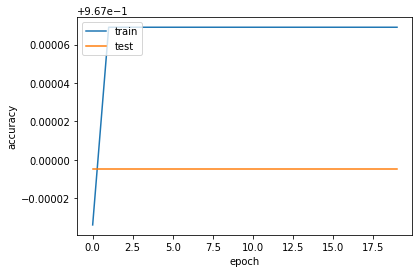

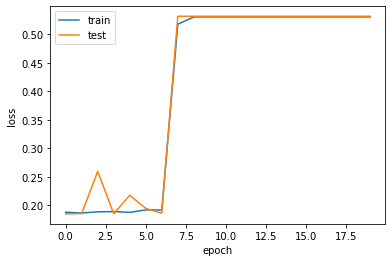

In [53]:
# Basic MLP without regularization or K Fold CV
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras import optimizers
import matplotlib.pyplot as plt


# model definition
model = Sequential()
model.add(Dense(16, input_dim = 8, kernel_initializer = 'normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, kernel_initializer = 'normal', activation='relu', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(16, kernel_initializer = 'normal',  activation='relu', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(8, kernel_initializer = 'normal', activation='relu', use_bias=False))

model.add(Dense(7, kernel_initializer = 'normal', activation='softmax'))

rmsp = optimizers.RMSprop(lr=0.01, rho=0.9)
# Compilation

# Using 'sparse categorical crossentropy' as loss fn as the input classes is an integer vector and not binary arrays
model.compile(loss='sparse_categorical_crossentropy', optimizer = rmsp, metrics = ['sparse_categorical_accuracy'])

history = model.fit(X_train, Y_train, validation_data=(X_validation,Y_validation), epochs=20, batch_size = 128)

# plot accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Model with regularization

Train on 931980 samples, validate on 232995 samples
Epoch 1/20
931980/931980 [==============================] - 23s 25us/step - loss: 0.1898 - sparse_categorical_accuracy: 0.9669 - val_loss: 0.1889 - val_sparse_categorical_accuracy: 0.9670
Epoch 2/20
931980/931980 [==============================] - 24s 25us/step - loss: 0.1866 - sparse_categorical_accuracy: 0.9671 - val_loss: 0.1921 - val_sparse_categorical_accuracy: 0.9670
Epoch 3/20
931980/931980 [==============================] - 19s 20us/step - loss: 0.1868 - sparse_categorical_accuracy: 0.9671 - val_loss: 0.1956 - val_sparse_categorical_accuracy: 0.9670
Epoch 4/20
931980/931980 [==============================] - 20s 21us/step - loss: 0.1865 - sparse_categorical_accuracy: 0.9671 - val_loss: 0.1916 - val_sparse_categorical_accuracy: 0.9670
Epoch 5/20
931980/931980 [==============================] - 19s 21us/step - loss: 0.1865 - sparse_categorical_accuracy: 0.9671 - val_loss: 0.1887 - val_sparse_categorical_accuracy: 0.9670
Epoch 6/

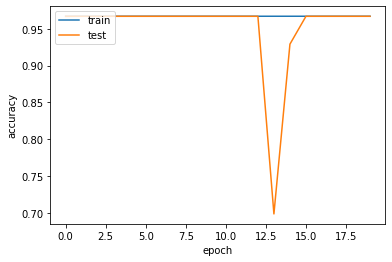

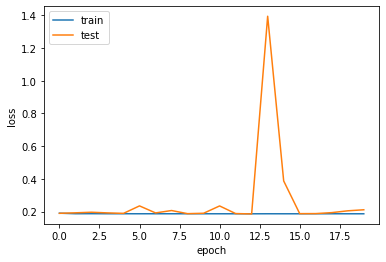

In [49]:
# Model with regularization

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras import optimizers
from keras import regularizers
import matplotlib.pyplot as plt

l2_reg = regularizers.l2(.01)

# model definition with regularization
model = Sequential()
model.add(Dense(16, input_dim = 8, kernel_initializer = 'normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, kernel_initializer = 'normal', kernel_regularizer=l2_reg, activation='relu', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(16, kernel_initializer = 'normal', kernel_regularizer=l2_reg, activation='relu', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(8, kernel_initializer = 'normal', kernel_regularizer=l2_reg, activation='relu', use_bias=False))

model.add(Dense(7, kernel_initializer = 'normal', activation='softmax'))

sgd = optimizers.SGD(lr=0.01, decay=1e-06, momentum=0.9, nesterov=True)
rmsp = optimizers.RMSprop(lr=0.01, rho=0.9)
# Compilation

# Using 'sparse categorical crossentropy' as loss fn as the input classes is an integer vector and not binary arrays
model.compile(loss='sparse_categorical_crossentropy', optimizer = rmsp, metrics = ['sparse_categorical_accuracy'])

history = model.fit(X_train, Y_train, validation_data=(X_validation,Y_validation), epochs=20, batch_size = 128)

# plot accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Model with K-fold CV & regularization

In [62]:
# converting classes to onehot encoded format to address issue with CV function taking only accuracy as a metric 
# and not sparse_categorical_accuracy
from keras.utils import to_categorical
classes_encoded = to_categorical(classes)

classes_encoded[3,]


array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [64]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras import optimizers
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt

l2_reg = regularizers.l2(.01)
def base_model():
    # model definition
    model = Sequential()
    model.add(Dense(16, input_dim = 8, kernel_initializer = 'normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(32, kernel_initializer = 'normal', kernel_regularizer=l2_reg, activation='relu', use_bias=False))
    model.add(BatchNormalization())
    model.add(Dense(16, kernel_initializer = 'normal', kernel_regularizer=l2_reg, activation='relu', use_bias=False))
    model.add(BatchNormalization())
    model.add(Dense(8, kernel_initializer = 'normal', kernel_regularizer=l2_reg, activation='relu', use_bias=False))
    
    model.add(Dense(7, kernel_initializer = 'normal', activation='softmax'))
    
    sgd = optimizers.SGD(lr=0.01, decay=1e-06, momentum=0.9, nesterov=True)
    rmsp = optimizers.RMSprop(lr=0.01, rho=0.9)
    # Compilation
    model.compile(loss='categorical_crossentropy', optimizer = rmsp, metrics = ['accuracy'])
    return model

# evaluate model
estimator = KerasClassifier(build_fn=base_model, epochs=10, batch_size = 512)
##estimator = []
##estimator.append(('standardize', StandardScaler()))
##estimator.append(('baseline_model', KerasClassifier(build_fn=baseline_model, epochs=10, batch_size = 512)))
##pipeline = Pipeline(estimator)

kfold = KFold(n_splits = 10)
# Model fitting & evaluation using k-fold CV
result = cross_val_score(estimator, feat_scaled, classes_encoded, cv=kfold)

result
#print("Model with CV: %.2f & MSE %.2f" % (result.mean(), result.std()))




Epoch 1/10
1048477/1048477 [==============================] - 14s 13us/step - loss: 0.1971 - accuracy: 0.9668
Epoch 2/10
1048477/1048477 [==============================] - 12s 11us/step - loss: 0.1842 - accuracy: 0.9673
Epoch 3/10
1048477/1048477 [==============================] - 12s 12us/step - loss: 0.1839 - accuracy: 0.9673
Epoch 4/10
1048477/1048477 [==============================] - 12s 11us/step - loss: 0.1840 - accuracy: 0.9673
Epoch 5/10
1048477/1048477 [==============================] - 12s 11us/step - loss: 0.1840 - accuracy: 0.9673
Epoch 6/10
1048477/1048477 [==============================] - 12s 12us/step - loss: 0.1841 - accuracy: 0.9673
Epoch 7/10
1048477/1048477 [==============================] - 14s 13us/step - loss: 0.1840 - accuracy: 0.9673
Epoch 8/10
1048477/1048477 [==============================] - 13s 12us/step - loss: 0.1840 - accuracy: 0.9673
Epoch 9/10
1048477/1048477 [==============================] - 12s 12us/step - loss: 0.1840 - accuracy: 0.9673
Epoch 10/1

array([0.96527839, 0.96627408, 0.96860892, 0.96757025, 0.96623117,
       0.96738112, 0.96890908, 0.96699488, 0.96490037, 0.96839404])

It can be see from above that using K-cross validation in addition to regularization, the model can perform at more than 96.5% accuracy for each of the 10 split datasets.


## Models with other Optimizers

Train on 931980 samples, validate on 232995 samples
Epoch 1/10
931980/931980 [==============================] - 71s 76us/step - loss: 0.1950 - sparse_categorical_accuracy: 0.9669 - val_loss: 0.1861 - val_sparse_categorical_accuracy: 0.9670
Epoch 2/10
931980/931980 [==============================] - 31s 34us/step - loss: 0.1849 - sparse_categorical_accuracy: 0.9671 - val_loss: 0.1850 - val_sparse_categorical_accuracy: 0.9670
Epoch 3/10
931980/931980 [==============================] - 32s 35us/step - loss: 0.1849 - sparse_categorical_accuracy: 0.9671 - val_loss: 0.1873 - val_sparse_categorical_accuracy: 0.9670
Epoch 4/10
931980/931980 [==============================] - 40s 43us/step - loss: 0.1857 - sparse_categorical_accuracy: 0.9671 - val_loss: 0.1921 - val_sparse_categorical_accuracy: 0.9670
Epoch 5/10
931980/931980 [==============================] - 35s 37us/step - loss: 0.1860 - sparse_categorical_accuracy: 0.9671 - val_loss: 0.1851 - val_sparse_categorical_accuracy: 0.9670
Epoch 6/

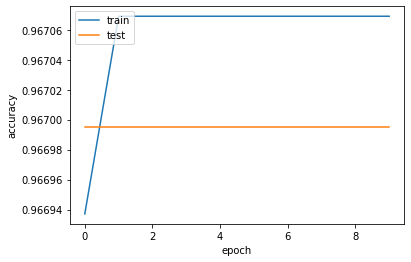

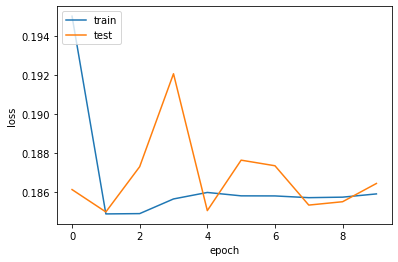

In [76]:
# Model with regularization and RMSProp with momentum = ADAM

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras import optimizers
from keras import regularizers
import matplotlib.pyplot as plt

l2_reg = regularizers.l2(.01)

# model definition with regularization
model = Sequential()
model.add(Dense(16, input_dim = 8, kernel_initializer = 'normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, kernel_initializer = 'normal', kernel_regularizer=l2_reg, activation='relu', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(16, kernel_initializer = 'normal', kernel_regularizer=l2_reg, activation='relu', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(8, kernel_initializer = 'normal', kernel_regularizer=l2_reg, activation='relu', use_bias=False))

model.add(Dense(7, kernel_initializer = 'normal', activation='softmax'))

rmsp_momentum = optimizers.Adam(lr=0.01)
# Compilation

# Using 'sparse categorical crossentropy' as loss fn as the input classes is an integer vector and not binary arrays
model.compile(loss='sparse_categorical_crossentropy', optimizer = rmsp_momentum, metrics = ['sparse_categorical_accuracy'])

history = model.fit(X_train, Y_train, validation_data=(X_validation,Y_validation), epochs=10, batch_size = 128)

# plot accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Prediction probability of each class is shown below.

In [51]:
model.predict(X_train, batch_size = 128)

array([[9.9001056e-01, 8.3209891e-03, 1.4890056e-03, ..., 9.9077930e-05,
        9.7532316e-10, 1.4353874e-09],
       [9.9041700e-01, 8.0478797e-03, 1.3824031e-03, ..., 8.4658794e-05,
        1.7408293e-09, 9.6660635e-10],
       [9.9057770e-01, 7.9385843e-03, 1.3409475e-03, ..., 7.9376376e-05,
        2.2066882e-09, 8.2205398e-10],
       ...,
       [9.9097532e-01, 7.6643191e-03, 1.2399760e-03, ..., 6.7259345e-05,
        4.0580272e-09, 5.4207172e-10],
       [9.9031562e-01, 8.1163906e-03, 1.4089760e-03, ..., 8.8124681e-05,
        1.5051039e-09, 1.0692672e-09],
       [9.9141371e-01, 7.3557873e-03, 1.1317792e-03, ..., 5.5435448e-05,
        8.2785148e-09, 3.3343869e-10]], dtype=float32)

## Imbalance

In [ ]:
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import roc_curve
#y_pred = model.predict(X_test).ravel()
#fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

y_pred = model.predict(X_validation)#, batch_size = 128)


In [79]:
confusion_matrix(Y_validation, y_pred.argmax(axis=1))

array([[225305,      0,      0,      0,      0,      0],
       [  4089,      0,      0,      0,      0,      0],
       [  1868,      0,      0,      0,      0,      0],
       [   895,      0,      0,      0,      0,      0],
       [   789,      0,      0,      0,      0,      0],
       [    49,      0,      0,      0,      0,      0]], dtype=int64)

It appears that the model predicts surge_multiplier = 1.0 most of the time i.e., with 0.99 probability. However, the data has surge_multiplier=1.0 for 96% of times.

More importantly, from the confusion matrix it can be seen that the model predicts class 0 for all other classes.

The reason for this skewed prediction is that the number of patterns in each class [0, 1, 2, 3, 4, 6] is [1126594, 20203, 9384, 4538, 4013, 243] respectively. It can be seen that the data is highly imbalanced. 

To address this deficiency purpose SMOTE will be used to generate additional data to balance the dataset.


### Addressing Imbalance of classes

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=7)
feat_bal, classes_bal = sm.fit_resample(feat_scaled,classes)

Xb_train, Xb_validation, Yb_train, Yb_validation = train_test_split(feat_bal, classes_bal, 
                                                                    test_size=validation_size, random_state=seed)
    

In [86]:
print(feat_bal.shape)

(6759564, 8)


Thus, SMOTE results in a dataset that is 6.7 million patterns.

In [ ]:
from imblearn.over_sampling import ADASYN
sm = ADASYN(random_state=7)
feat_as, classes_as = sm.fit_resample(feat_scaled,classes)

Xas_train, Xas_validation, Yas_train, Yas_validation = train_test_split(feat_as, classes_as, 
                                                                    test_size=validation_size, random_state=seed)
print(feat_as.shape)

In [87]:
from imblearn.under_sampling import RandomUnderSampler
ru = RandomUnderSampler(ratio={1: 100, 0: 65},random_state=7)
ru.fit(feat_scaled,classes)
feat_ru, classes_ru = ru.fit_sample(feat_scaled,classes)

Xru_train, Xru_validation, Yru_train, Yru_validation = train_test_split(feat_ru, classes_ru, 
                                                                test_size=validation_size, random_state=seed)
print(feat_ru.shape)

(19243, 8)


Train on 15394 samples, validate on 3849 samples
Epoch 1/30
15394/15394 [==============================] - 4s 246us/step - loss: 1.3510 - sparse_categorical_accuracy: 0.4722 - val_loss: 1.4529 - val_sparse_categorical_accuracy: 0.4819
Epoch 2/30
15394/15394 [==============================] - 1s 57us/step - loss: 1.2745 - sparse_categorical_accuracy: 0.4891 - val_loss: 1.3222 - val_sparse_categorical_accuracy: 0.4819
Epoch 3/30
15394/15394 [==============================] - 1s 66us/step - loss: 1.2655 - sparse_categorical_accuracy: 0.4891 - val_loss: 1.2892 - val_sparse_categorical_accuracy: 0.4819
Epoch 4/30
15394/15394 [==============================] - 1s 55us/step - loss: 1.2594 - sparse_categorical_accuracy: 0.4891 - val_loss: 1.2607 - val_sparse_categorical_accuracy: 0.4819
Epoch 5/30
15394/15394 [==============================] - 1s 57us/step - loss: 1.2564 - sparse_categorical_accuracy: 0.4891 - val_loss: 1.2624 - val_sparse_categorical_accuracy: 0.4819
Epoch 6/30
15394/15394 [=

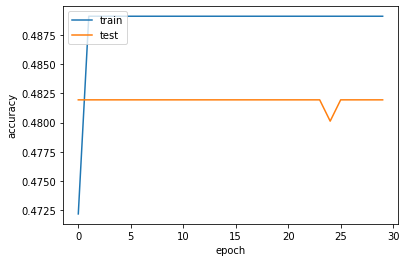

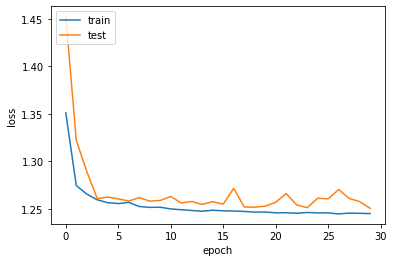

In [88]:
# Model with regularization

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras import optimizers
from keras import regularizers
import matplotlib.pyplot as plt

l2_reg = regularizers.l2(.01)

# model definition with regularization
model = Sequential()
model.add(Dense(16, input_dim = 8, kernel_initializer = 'normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, kernel_initializer = 'normal', kernel_regularizer=l2_reg, activation='relu', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(16, kernel_initializer = 'normal', kernel_regularizer=l2_reg, activation='relu', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(8, kernel_initializer = 'normal', kernel_regularizer=l2_reg, activation='relu', use_bias=False))

model.add(Dense(7, kernel_initializer = 'normal', activation='softmax'))

rmsp = optimizers.RMSprop(lr=0.01, rho=0.9)
# Compilation

# Using 'sparse categorical crossentropy' as loss fn as the input classes is an integer vector and not binary arrays
model.compile(loss='sparse_categorical_crossentropy', optimizer = rmsp, metrics = ['sparse_categorical_accuracy'])

history = model.fit(Xru_train, Yru_train, validation_data=(Xru_validation,Yru_validation), epochs=30, batch_size = 256)

# plot accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [ ]:

y_pred = model.predict(X_validation)#, batch_size = 128)
confusion_matrix(Y_validation, y_pred.argmax(axis=1))

# Conclusions

The dataset used for classification is a classic case of imbalanced dataset. The model fit using imbalanced data gives a very high accuracy. However, the confusion matrix output shows the real predictive output, where the majority class is predicted for all other classes as well. As a result there are several false positives.

When the dataset is balanced, it is much more difficult to train the model with reasonable accuracy. In addition, the size of the input data increases enormously due to oversampling techniques such as SMOTE or ADASYN. SMOTE resulted in a dataset size of close to 7 million patterns. This places further burden on training a five layers dense network with several parameters to estimated.

In order to improve the accuracy for the multi-layer perceptron, other methods such as class weights may be used. Also, adding dropout rates can help reduce parameter size and speed up the training process.

Note: Unfortunately due to lack of sufficient computational power and time, these methods could not be explored.

Ideally, this dataset is more suited to be modeled using more "traditional" non-Neural network based methods such as XGBoost.

More features:
On the other hand, more features can be added that show correlation to surge_multiplier. These features can provide more explanatory power to the model. 

As shown below, features such as the type of cab ride i.e., whether it is 'shared', 'luxury' (Lux), bigger size vehicle (XL) show direct correlation to the price. Also, time of day (peak or off-peak) also has a high correlation with price. All or some of these features can be added as dummy variables.

In [84]:
# Separating out lyft & Uber as the naming of rides is different in each ride provider

df_lyft = cabs_df[cabs_df['cab_type']=='Lyft']
df_uber = cabs_df[cabs_df['cab_type']=='Uber']
lyft_type = pd.CategoricalDtype(categories=['Shared', 'Lyft', 'Lyft XL','Lux', 'Lux Black','Lux Black XL'],
                             ordered=True)
#del df_lyft['time_stamp']
del df_lyft['id']
del df_lyft['product_id']

df_lyft.head(2)



,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name,time_source
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16 09:30:07.890
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27 02:00:23.677


In [12]:
# Dummy variables for type of ride service

dummy_lyft = pd.get_dummies(df_lyft['name'], dtype=int)
dummy_lyft.head(3)


,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,0,0,1,0,0


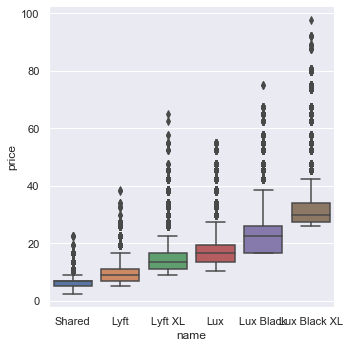

In [14]:
sns.set()
sns.catplot(y='price',x='name',kind='box',data=df_lyft, 
            order=['Shared', 'Lyft', 'Lyft XL','Lux', 'Lux Black','Lux Black XL'])

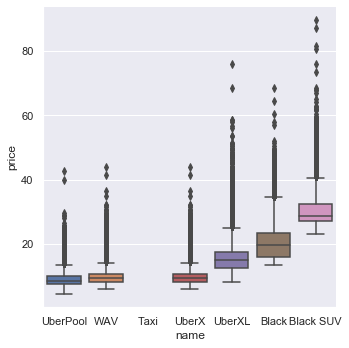

In [16]:
sns.catplot(y='price',x='name',kind='box',data=df_uber, 
            order=['UberPool','WAV','Taxi','UberX', 'UberXL', 'Black', 'Black SUV'])


It appears that there is a correlation between the type of service and price, which is expected.
Lyft - ['Shared', 'Lyft', 'Lyft XL','Lux', 'Lux Black','Lux Black XL'] in that order
Uber - ['UberPool','WAV','UberX', 'UberXL', 'Black', 'Black SUV'] in that order

In [85]:
df_lyft_dum = pd.concat([df_lyft,dummy_lyft],axis=1)

In [88]:
df_lyft_dum.head(2)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name,time_source,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16 09:30:07.890,0,0,0,0,0,1
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27 02:00:23.677,1,0,0,0,0,0


In [95]:
# Creating dummy variables for peak time & week day

#df_lyft_dum['peak_time']= 1 if ((df_lyft_dum['time_source'].dt.hour > 15) & 
#                (df_lyft_dum['time_source'].dt.hour < 21)) else 0 
df_lyft_dum['peak_time']= 0 
df_lyft_dum.loc[(df_lyft_dum['time_source'].dt.hour > 5) & 
                (df_lyft_dum['time_source'].dt.hour < 11),'peak_time']= 1
df_lyft_dum.loc[(df_lyft_dum['time_source'].dt.hour > 15) & 
                (df_lyft_dum['time_source'].dt.hour < 21),'peak_time']= 1

df_lyft_dum['wkday'] = 1
df_lyft_dum.loc[(df_lyft_dum['time_source'].dt.weekday < 1) & 
                (df_lyft_dum['time_source'].dt.weekday > 5),'peak_time']= 0

df_lyft_dum.head(3)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name,time_source,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,peak_time,wkday
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16 09:30:07.890,0,0,0,0,0,1,1,1
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27 02:00:23.677,1,0,0,0,0,0,0,1
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,Lyft,2018-11-28 01:00:22.198,0,0,0,1,0,0,0,1


In [97]:
df_lyft_dum.corr()

,distance,time_stamp,price,surge_multiplier,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,peak_time,wkday
distance,1.000000,0.004085,0.361567,0.040076,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,0.000015,0.000216,NaN
time_stamp,0.004085,1.000000,0.001909,0.001093,-0.001895,0.000967,0.000371,-0.001550,0.000550,0.001557,0.024260,NaN
price,0.361567,0.001909,1.000000,0.308237,0.018740,0.254920,0.668322,-0.345506,-0.091148,-0.505335,-0.001722,NaN
surge_multiplier,0.040076,0.001093,0.308237,1.000000,0.019478,0.019478,0.019478,0.022343,0.022343,-0.103121,-0.005464,NaN
Lux,-0.000003,-0.001895,0.018740,0.019478,1.000000,-0.200002,-0.200002,-0.200002,-0.200002,-0.199997,0.000643,NaN
Lux Black,-0.000003,0.000967,0.254920,0.019478,-0.200002,1.000000,-0.200002,-0.200002,-0.200002,-0.199997,-0.000583,NaN
Lux Black XL,-0.000003,0.000371,0.668322,0.019478,-0.200002,-0.200002,1.000000,-0.200002,-0.200002,-0.199997,-0.000441,NaN
Lyft,-0.000003,-0.001550,-0.345506,0.022343,-0.200002,-0.200002,-0.200002,1.000000,-0.200002,-0.199997,-0.001650,NaN
Lyft XL,-0.000003,0.000550,-0.091148,0.022343,-0.200002,-0.200002,-0.200002,-0.200002,1.000000,-0.199997,0.000057,NaN
Shared,0.000015,0.001557,-0.505335,-0.103121,-0.199997,-0.199997,-0.199997,-0.199997,-0.199997,1.000000,0.001973,NaN


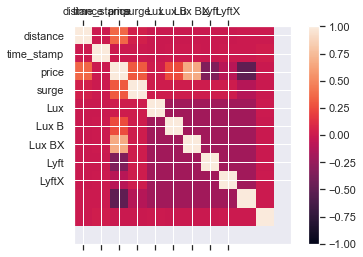

In [101]:
# Correlation Matrix plot

num_cols = ['distance','time_stamp','price','surge','Lux','Lux B','Lux BX','Lyft','LyftX','Share','peak']
correlations = df_lyft_dum.corr()
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(num_cols)
ax.set_yticklabels(num_cols)
pyplot.show()